In [1]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

##### For Preprocessing #####
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

##### For Building the Model #####
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline

##### For Validation of the Model #####
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
#1 Load Advertising.csv dataset using pandas

In [3]:
data = pd.read_csv("Advertising.csv", index_col = 0)
print("Size of the data:", data.shape)
data.head()

Size of the data: (200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
#2  Standardize each column of the dataset

In [5]:
#New copy of the original dataframe that contains the standardized values
data1 = data.copy()

#For the values in the TV feature
data1_tv_mean = data1['TV'].mean()
data1_tv_std = data1['TV'].std()
data1['TV'] = (data1['TV'] - data1_tv_mean) / data1_tv_std
#For the values in the Radio feature
data1_radio_mean = data1['Radio'].mean()
data1_radio_std = data1['Radio'].std()
data1['Radio'] = (data1['Radio'] - data1_radio_mean) / data1_radio_std
#For the values in the Newspaper feature
data1_np_mean = data1['Newspaper'].mean()
data1_np_std = data1['Newspaper'].std()
data1['Newspaper'] = (data1['Newspaper'] - data1_np_mean) / data1_np_std
#For the values in the Sales feature
data1_sales_mean = data1['Sales'].mean()
data1_sales_std = data1['Sales'].std()
data1['Sales'] = (data1['Sales'] - data1_sales_mean) / data1_sales_std

print(data)
data1

        TV  Radio  Newspaper  Sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


,TV,Radio,Newspaper,Sales
1,0.967425,0.979066,1.774493,1.548168
2,-1.194379,1.080097,0.667903,-0.694304
3,-1.512360,1.524637,1.779084,-0.905135
4,0.051919,1.214806,1.283185,0.858177
5,0.393196,-0.839507,1.278593,-0.215143
...,...,...,...,...
196,-1.267759,-1.317724,-0.769287,-1.230964
197,-0.615491,-1.236899,-1.031011,-0.828469
198,0.348934,-0.940539,-1.109069,-0.234310
199,1.590574,1.261955,1.636743,2.199827


In [6]:
#Alternative way - using sklearn's preprocessing.scale function
data_standardize = preprocessing.scale(data)

#Convert standardized data to dataframe
data_standardize = pd.DataFrame(data_standardize, columns = data.columns)

data_standardize

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


In [7]:
#3 So you must add an extra column composing of all ones to X

In [8]:
data_standardize.insert(0, 'all_ones', 1)
print(data)
data_standardize

        TV  Radio  Newspaper  Sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


,all_ones,TV,Radio,Newspaper,Sales
0,1,0.969852,0.981522,1.778945,1.552053
1,1,-1.197376,1.082808,0.669579,-0.696046
2,1,-1.516155,1.528463,1.783549,-0.907406
3,1,0.052050,1.217855,1.286405,0.860330
4,1,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...,...
195,1,-1.270941,-1.321031,-0.771217,-1.234053
196,1,-0.617035,-1.240003,-1.033598,-0.830548
197,1,0.349810,-0.942899,-1.111852,-0.234898
198,1,1.594565,1.265121,1.640850,2.205347


In [9]:
#4   Divide the dataset into training and testing, with 0.85 and 0.25 ratio, respectively

In [10]:
#Features
features = data_standardize[['all_ones', 'TV', 'Radio', 'Newspaper']]
print(features)
#Sales
target = data_standardize['Sales']
print(target)
#0.75% or 75% for training and 0.5% or 25% for testing, as advised by Ma'am Ara
X_training, X_testing, y_training, y_testing = train_test_split(features, target, train_size = 0.75, test_size = 0.25)

     all_ones        TV     Radio  Newspaper
0           1  0.969852  0.981522   1.778945
1           1 -1.197376  1.082808   0.669579
2           1 -1.516155  1.528463   1.783549
3           1  0.052050  1.217855   1.286405
4           1  0.394182 -0.841614   1.281802
..        ...       ...       ...        ...
195         1 -1.270941 -1.321031  -0.771217
196         1 -0.617035 -1.240003  -1.033598
197         1  0.349810 -0.942899  -1.111852
198         1  1.594565  1.265121   1.640850
199         1  0.993206 -0.990165  -1.005979

[200 rows x 4 columns]
0      1.552053
1     -0.696046
2     -0.907406
3      0.860330
4     -0.215683
         ...   
195   -1.234053
196   -0.830548
197   -0.234898
198    2.205347
199   -0.119610
Name: Sales, Length: 200, dtype: float64


In [11]:
#5  MAKING OF REQUIRED FUNCTIONS
#   Fit the model on the training set. Essentially, you have to optimize the model using the
#   training set, and not including the test set. (Instruction 5 elaborated below)

In [12]:
# 5.1  initialize_weights: returns a vector init_w composing of 4 uniformly
# distributed numbers between 0 and 1. This serves as the initial weights �/, for � =
# 0, 1, 2, 3. You can set a random seed so you can objectively assess if your model is
# working correctly. Seed function is used to save the state of a random function, so that it
# can generate same random numbers on multiple executions of the code. Alternatively,
# you can just set init_w = np.array([0.0, 0.0, 0.0, 0.0]). Note that the
# first weight refers to the weight of the bias and the rest represents the weights of the
# predictors

In [13]:
def initialize_weights_notzeros(X):
    #Weights' length equals the number of columns in x.
    X_len = X.shape[1]
    #The weights will be randomly initialized if random = True.
    return np.random.rand(X_len)


def initialize_weights():
    init_w = np.zeros(4)
    return init_w


#using random values that are not zero to test the initial weight
#If the weights are set to non-zero values at random initialization
weights = initialize_weights_notzeros(X_training)
weights

array([0.46247606, 0.10164674, 0.57804679, 0.85773365])

In [14]:
#Using all zero values to test the initialize weight
#Upon initializing the weights at random,
weights = initialize_weights()
weights

array([0., 0., 0., 0.])

In [15]:
# 5.2 Predict: returns a vector of the predicted values

In [16]:
def predict(X, weights):
    y_hat = np.dot(X, weights)
    return y_hat



#Utilizing a random set of weights, predict the values of the training set.
y_hat_train = predict(X_training, initialize_weights_notzeros(X_training))
#through the use of a new dataframe, comparing the predicted and actual values
data_train = pd.DataFrame({'Actual Values': y_training, 'Predicted Values': y_hat_train})
data_train

,Actual Values,Predicted Values
148,-0.599973,0.243288
131,-0.254112,0.635216
13,-0.830548,-0.106100
185,1.648126,0.654045
44,-1.061122,0.549051
...,...,...
30,1.417551,0.958825
111,1.494410,0.683624
37,0.130178,0.919170
173,-0.446257,0.076271


In [17]:
# 5.3 compute_cost: returns a scalar value that tells us how accurate the model is.

In [18]:
def compute_cost(X, y, weights):  
    #Set the response's length to a starting value.
    m = len(y)
    error = predict(X, weights) - y
    cost = 1/(2*m) * np.sum((error)**2)
    return cost

#Use a random set of weights to print the training set's cost
cost_test = compute_cost(X_training, y_training, initialize_weights_notzeros(X_training))
print(cost_test)

0.791155492365453


In [19]:
#  5.4  
# compute_gradient: returns a matrix w that represents the partial derivative of the
# cost function 

In [20]:
def compute_gradient(X, y, weights):
    m = len(y)
    error = predict(X, weights) - y
    gradient = 1/m * np.dot(X.T, (error))
    #returns matrix w
    return gradient

In [21]:
#  5.5 update of weights

In [22]:
def update_weights(X, y, weights, alpha):
    
    return weights - alpha * compute_gradient(X, y, weights)

In [23]:
#  5.6 grad_descent

In [24]:
def grad_descent(X, y, weights, alpha, iterations):
    #setting up the two matrices to start with
    weights_matrix = []
    cost_matrix = []

    #counting the number of iterations in a loop
    #the batch gradient descent is used
    for i in range(iterations):
        #Updating weights
        weights = update_weights(X, y, weights, alpha)
        #Store the weights in the weights matrix
        weights_matrix.append(weights)
        #Computing cost
        cost = compute_cost(X, y, weights)
        #Store the cost in the cost matrix
        cost_matrix.append(cost)
    return weights_matrix, cost_matrix

In [25]:
#  5.7  plot_costs

In [26]:
 def plot_costs(cost_array):
    #Size of the plot
    plt.figure(figsize=(15,8))
    plt.plot(cost_array)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost over Iterations')
    plt.show()
    

In [27]:
#  5.8  Predict y for train set and calculate the cost.

In [28]:

y_hat_train = predict(X_training, initialize_weights_notzeros(X_training))
y_hat_train_data = pd.DataFrame({'Actual Values': y_training, 'Predicted Values': y_hat_train})
y_hat_train_data

#calculate cost for TRAIN set
train_cost = compute_cost(X_training, y_training, weights)
print("Cost for TRAIN set:", train_cost)

Cost for TRAIN set: 0.5202203388513807


In [29]:
# 5.9 Predict y for test set and calculate the cost

In [30]:

y_hat_test = predict(X_testing, initialize_weights_notzeros(X_testing))
y_hat_test_data = pd.DataFrame({'Actual Values': y_testing, 'Predicted Values': y_hat_test})
y_hat_test_data['Residual Values'] = y_hat_test_data['Actual Values'] - y_hat_test_data['Predicted Values']
print(y_hat_test_data)

#calculate cost for TEST set
test_cost = compute_cost(X_testing, y_testing, weights)
print("Cost for TEST set:", test_cost)

     Actual Values  Predicted Values  Residual Values
196      -0.830548         -0.519997        -0.310551
169       0.187822          0.062246         0.125576
10       -1.041908         -0.214555        -0.827352
12       -0.926620          1.245614        -2.172235
61        1.955558          1.781112         0.174446
39        1.436766          1.078810         0.357956
68        0.937188          0.412039         0.525150
181      -0.350185          0.245319        -0.595504
46       -0.657617          0.193037        -0.850654
141       0.994832          1.911353        -0.916521
77        0.034106          0.200533        -0.166428
170      -1.080337         -0.259056        -0.821280
166      -1.157195          0.297044        -1.454239
129      -0.830548          0.325499        -1.156046
64        0.764258          0.868590        -0.104333
121      -1.349340          0.593992        -1.943332
187       0.629756          0.478136         0.151620
69        1.590482          

In [31]:
# 6 grad_descent: returns 2 matrices: one matrix for the weights, and one matrix for the
# cost values per iteration. grad_descent calls the functions 1-5 until the number of
# iterations is reached. 

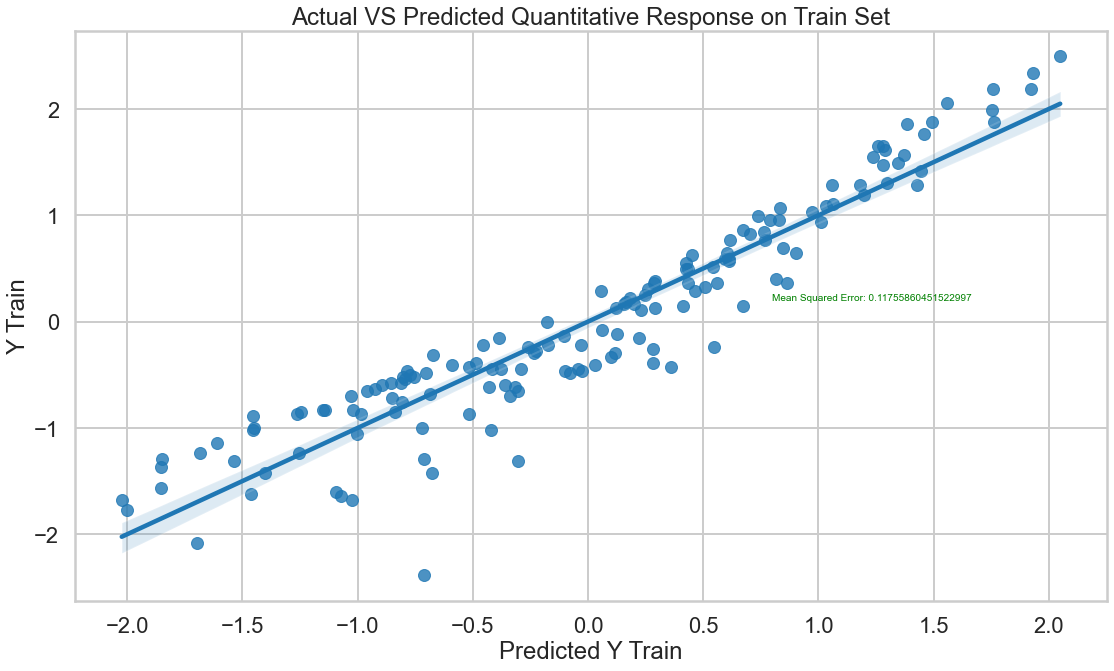

In [32]:
weights = initialize_weights_notzeros(X_training)

#Initialize the iterations and alpha values.
alpha = 0.01
iterations = 10000                          



#Run the algorithm for gradient descent (Training )
weights_train = grad_descent(X_training, y_training, weights, alpha, iterations)[0]

#Utilize the train set to predict the quantitative response.
y_hat_train = predict(X_training, weights_train[-1])

X_training["Predicted Y Train"] = y_hat_train
X_training["Y Train"] = y_training


#In order to plot
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.title('Actual VS Predicted Quantitative Response on Train Set')
#FOR THE MSE EVALUATION
plt.text(0.8, 0.20, f"Mean Squared Error: {mean_squared_error(y_training, y_hat_train)}", color='green')

sns.regplot(x="Predicted Y Train", y=X_training["Y Train"], data=X_training)

# Delete the columns "Y Test" and "Predicted Y Test" from x train.
X_training = X_training.drop(["Y Train", "Predicted Y Train"], axis=1)

In [33]:
# EVALUATION: As seen above, the Mean Squared Error (MSE) is 0.11102077.

# Utilize MSE and R2 to assess performance for the TRAIN set.
# r2 score and mean squared error from Sklearn
MSE_train = mean_squared_error(y_training, y_hat_train)
R2_train = r2_score(y_training, y_hat_train)

print("MSE for TRAIN set:", MSE_train)
print("R2 for TRAIN set:", R2_train)

# verify R2 using ols from statsmodels
ols = LinearRegression()
ols.fit(X_training, y_training)
print("OLS for TRAIN set:", ols.score(X_training, y_training))


# The model is more accurate the closer the MSE value is to zero. 
# As a result, we may say that our model is already effective.

MSE for TRAIN set: 0.11755860451522997
R2 for TRAIN set: 0.8870107435670415
OLS for TRAIN set: 0.8870107435670415


In [34]:
# 7   Predict the quantitative response y on the test set. Evaluate performance. Similarly, you
#     can use the MSE cost function defined for the gradient descent
#  initialize_weights_notzeros(X_testing)

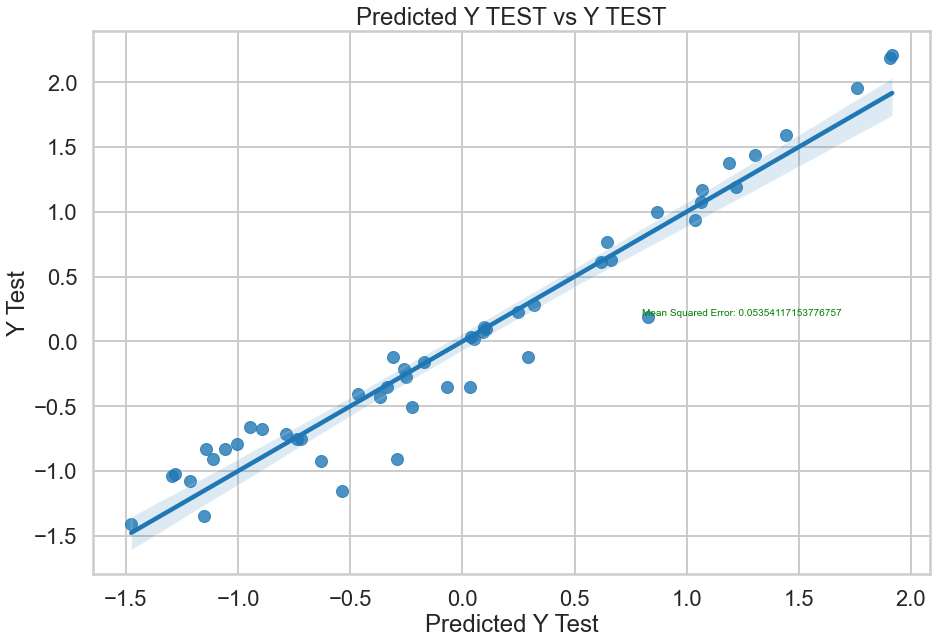

In [35]:

#Run the algorithm for gradient descent (Training )
weights_test = grad_descent(X_testing, y_testing, weights, alpha, iterations)[0]

#Utilize the train set to predict the quantitative response.
y_hat_test = predict(X_testing, weights_test[-1])


# add predicted y to TEST set as a column
X_testing["Predicted Y Test"] = y_hat_test

# add y_train to TEST set as a column
X_testing["Y Test"] = y_testing

#In order to plot
plt.figure(figsize=(15,10))
plt.title("Predicted Y TEST vs Y TEST")
#FOR THE MSE EVALUATION
plt.text(0.8, 0.20, f"Mean Squared Error: {mean_squared_error(y_testing, y_hat_test)}", color='green')

sns.regplot(x="Predicted Y Test", y=X_testing["Y Test"], data=X_testing)

#Delete the columns "Y Test" and "Predicted Y Test" from x test.
X_testing = X_testing.drop(["Y Test", "Predicted Y Test"], axis=1)


In [66]:
# EVALUATION: The Mean Squared Error is 0.118558126963
# It means that our model, which was developed using the training set, was able to accurately predict the test set.
# However, the MSE in the test dataset is higher than the MSE in our train dataset, indicating that it isn't any better.

# Utilize MSE and R2 to assess performance for the TEST set.
# r2 score and mean squared error from Sklearn
MSE_test = mean_squared_error(y_testing, y_hat_test)
R2_test = r2_score(y_testing, y_hat_test)

print("MSE for TEST set:", MSE_test)
print("R2 for TEST set:", R2_test)

# verify R2 using ols from statsmodels
ols = LinearRegression()
ols.fit(X_testing, y_testing)
print("OLS for TEST set:", ols.score(X_testing, y_testing))


MSE for TEST set: 0.05354117153776757
R2 for TEST set: 0.9390661407164399
OLS for TEST set: 0.9390661407164399


In [37]:
# 8   Note: Since the data is standardized, you might be surprised that the predictions differ
#     from the original data. In order to revert back a standardized data into the original form,
#     we simply have to equate the previous equation:

In [38]:

#Create a new column called "Projected Sales"
data_standardize['Predicted Sales'] = predict(data_standardize[['all_ones', 'TV', 'Radio', 'Newspaper']], weights_train[-1])

#Put the standardized data back in its original format.
data_standardize['TV'] = data_standardize['TV'] * data['TV'].std() + data['TV'].mean()
data_standardize['Radio'] = data_standardize['Radio'] * data['Radio'].std() + data['Radio'].mean()
data_standardize['Newspaper'] = data_standardize['Newspaper'] * data['Newspaper'].std() + data['Newspaper'].mean()
data_standardize['Sales'] = data_standardize['Sales'] * data['Sales'].std() + data['Sales'].mean()
data_standardize['Predicted Sales'] = data_standardize['Predicted Sales'] * data['Sales'].std() + data['Sales'].mean()

#Insert Residuals column
data_standardize['Residuals'] = data_standardize['Sales'] - data_standardize['Predicted Sales']

# remove the column all_ones
data_standardize.drop('all_ones', axis = 1, inplace = True)

data_standardize


#  The y and x axis of the non-standardized data have a wider range of values,
#  Plot #6 illustrates how the standardized and non-standardized data plots otherwise resemble one another.

,TV,Radio,Newspaper,Sales,Predicted Sales,Residuals
0,230.308426,37.836477,69.296979,22.120270,20.470646,1.649624
1,44.242678,39.340241,45.136502,10.390910,12.252126,-1.861216
2,16.874171,45.956803,69.397230,9.288149,12.247864,-2.959715
3,151.511186,41.345260,58.570128,18.511236,17.531576,0.979660
4,180.884712,10.768723,58.469877,12.897183,13.109979,-0.212796
...,...,...,...,...,...,...
195,37.926869,3.650906,13.757957,7.583883,5.236889,2.346995
196,94.067396,4.853917,8.043654,9.689153,8.029376,1.659777
197,177.075176,9.264959,6.339388,12.796932,12.654241,0.142691
198,283.942679,42.047016,66.289451,25.528802,23.715448,1.813353


In [39]:
#  9   Observe the cost results and analyse. 

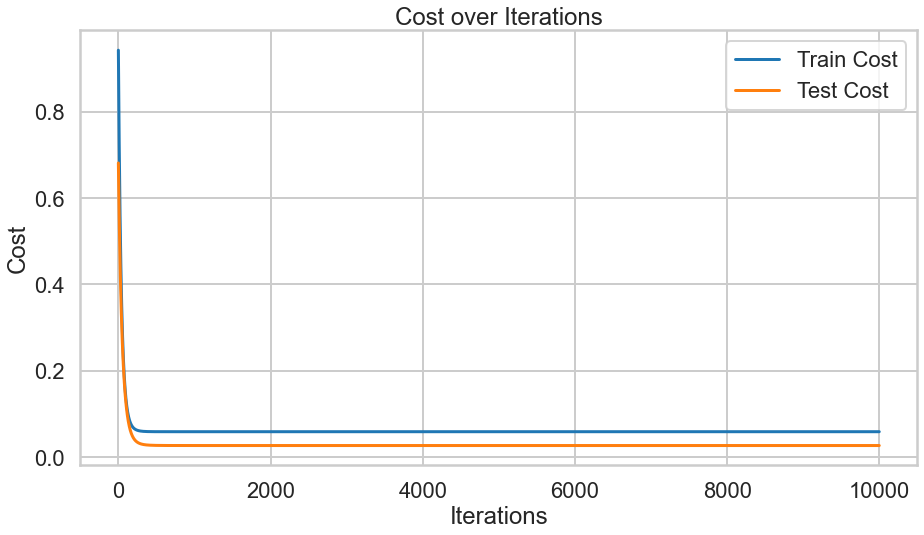

In [40]:
cost_training = grad_descent(X_training, y_training, weights, alpha, iterations)[1]
cost_testing = grad_descent(X_testing, y_testing, weights, alpha, iterations)[1]


plt.figure(figsize=(15,8))
plt.plot(cost_training, label='Train Cost')
plt.plot(cost_testing, label='Test Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations')
plt.legend()
plt.show()

In [41]:
# FOR THE QUESTIONS AT THE END. FROM THE PDF FILE



# THE FOLLOWING ARE "SCRATCH" CODES USED FOR THE HW3 QUESTIONS

In [42]:
# 1   What are the optimal weights found by your implemented gradient descent? Plug it into
#     the linear model:


# Initial weights are zero. 
w = initialize_weights()
print("Initial weights:", w)
# Learning rate and the no. of iterations
alpha = 0.01    
iterations = 50000    #according to the guide                                              

# Gradient descent algorithm execution for all weights (TRAIN & TEST)
weights_all , cost_all = grad_descent(X_training, y_training, w, alpha, iterations)

# Obtaining the ideal weights
optimal_weights = weights_all[-1]

# to print the ideal weights for TRAIN, TEST, and Both SETS
print("OPtimal weights for the TRAIN set:\n", weights_train[-1]) #[-1] the most recent set of weights

print("Optimal weights for theTEST set:\n", weights_test[-1]) #[-1] the most recent set of weights

print("Optimal Weights: ",optimal_weights)

#Plugging it into the linear model
print(f"hΘ(x) = {optimal_weights[0]} + {optimal_weights[1]}*TV + {optimal_weights[2]}*Radio + {optimal_weights[3]}*Newspaper")





Initial weights: [0. 0. 0. 0.]
OPtimal weights for the TRAIN set:
 [-1.96670168e-02  7.51969467e-01  5.36417971e-01 -1.45856666e-04]
Optimal weights for theTEST set:
 [ 0.05929736  0.75469469  0.5478546  -0.02456252]
Optimal Weights:  [-1.96670168e-02  7.51969467e-01  5.36417971e-01 -1.45856666e-04]
hΘ(x) = -0.01966701681632849 + 0.7519694669233258*TV + 0.5364179714181474*Radio + -0.0001458566664254388*Newspaper


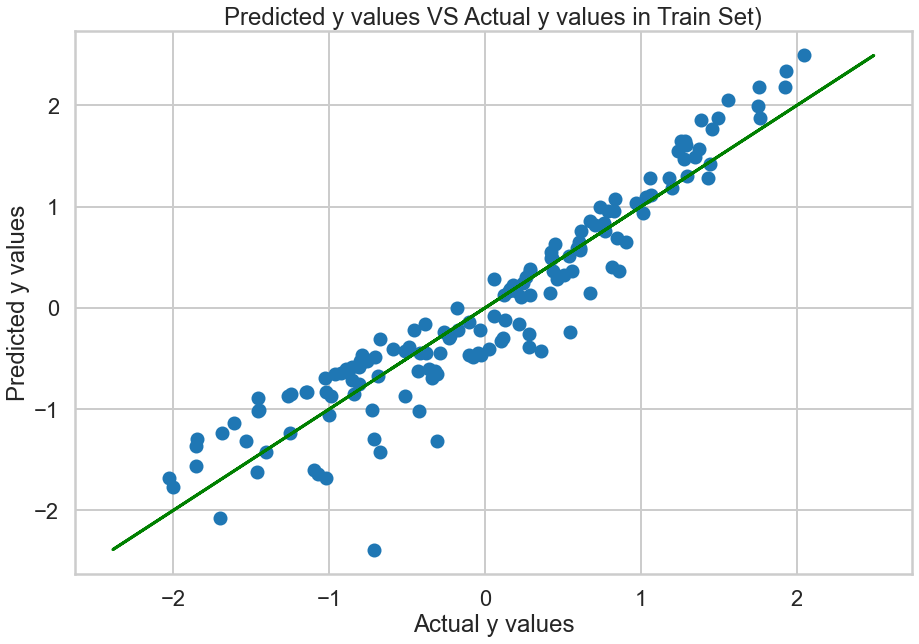

The r2 score is 0.8870107435670415


In [43]:
#   2   Provide a scatter plot for both the train and test set. Is there a
#       trend? Provide an r2 score




#Scatterplot of actual y values VS predicted y values in the TRAIN set
predict_train = predict(X_training, optimal_weights)
plt.figure(figsize=(15,10))
plt.scatter(predict_train,y_training )

plt.xlabel('Actual y values')
plt.ylabel('Predicted y values')
plt.title('Predicted y values VS Actual y values in Train Set)')
plt.plot(y_training, y_training, color='green')

plt.show()




#r2 score of the train set
print(f"The r2 score is {r2_score(y_training, predict_train)}")

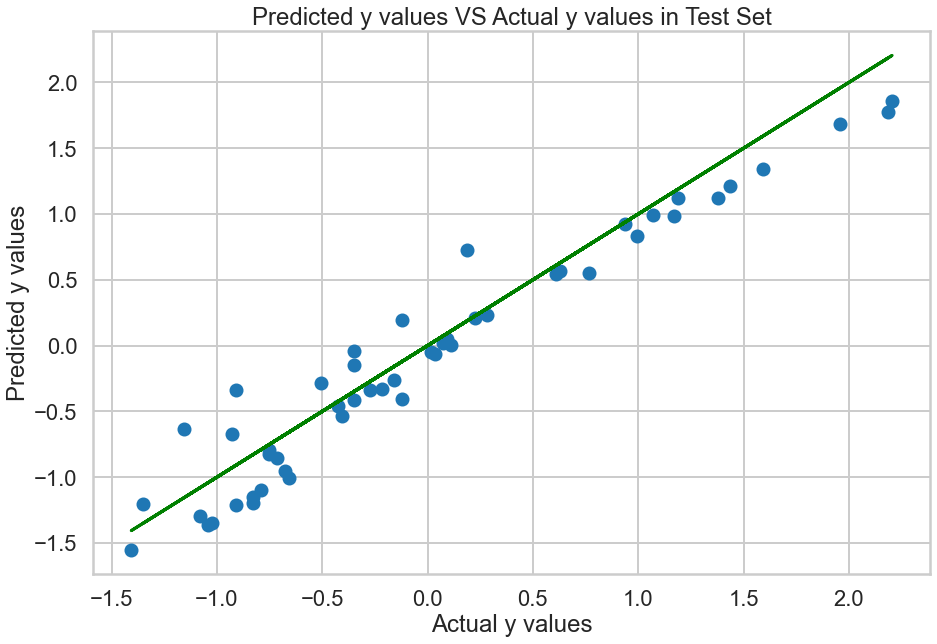

The r2 score is 0.9316007090514221


In [44]:
#Scatterplot of actual y values VS predicted y values in the TEST set
predict_test = predict(X_testing, optimal_weights)
plt.figure(figsize=(15,10))
plt.scatter(y_testing, predict_test)
plt.xlabel('Actual y values')
plt.ylabel('Predicted y values')
plt.title('Predicted y values VS Actual y values in Test Set')
plt.plot(y_testing, y_testing, color='green')
plt.show()






#r2 score of the test set
print(f"The r2 score is {r2_score(y_testing, predict_test)}")

In [45]:
# 3   What happens to the error, r2, and cost as the number of iterations increase? Show your
#     data and proof. You can alternatively plot your result data for visualization and check
#     until 50000 iterations or more (actually).



#Solve for the MSE for each iterations
#Utilizing sklearn
# create a list of MSE
mse_list = []

# create a list of r2
r2_list = []

# create a list of cost
cost_list = []

# compute the cost values for each iteration
cost_val = grad_descent(X_training, y_training, weights, alpha, iterations)[1]



# compute MSE for each iteration
print(len(weights_all))

for i in range(iterations):
    MSE = mean_squared_error(y_training, predict(X_training, weights_all[i]))
    mse_list.append(MSE)

# compute R2 for each iteration
#print(weights_train[i])
for i in range(iterations):
    y_hat_train = predict(X_training, weights_all[i])
    r2_list.append(r2_score(y_training, y_hat_train))

    
iteration_df = pd.DataFrame({"Cost": cost_val, "MSE/Error": mse_list, "R2": r2_list})
iteration_df
    

50000


,Cost,MSE/Error,R2
0,0.941930,1.019334,0.020286
1,0.919386,0.998735,0.040084
2,0.897436,0.978632,0.059406
3,0.876064,0.959011,0.078264
4,0.855254,0.939861,0.096670
...,...,...,...
49995,0.058779,0.117559,0.887011
49996,0.058779,0.117559,0.887011
49997,0.058779,0.117559,0.887011
49998,0.058779,0.117559,0.887011


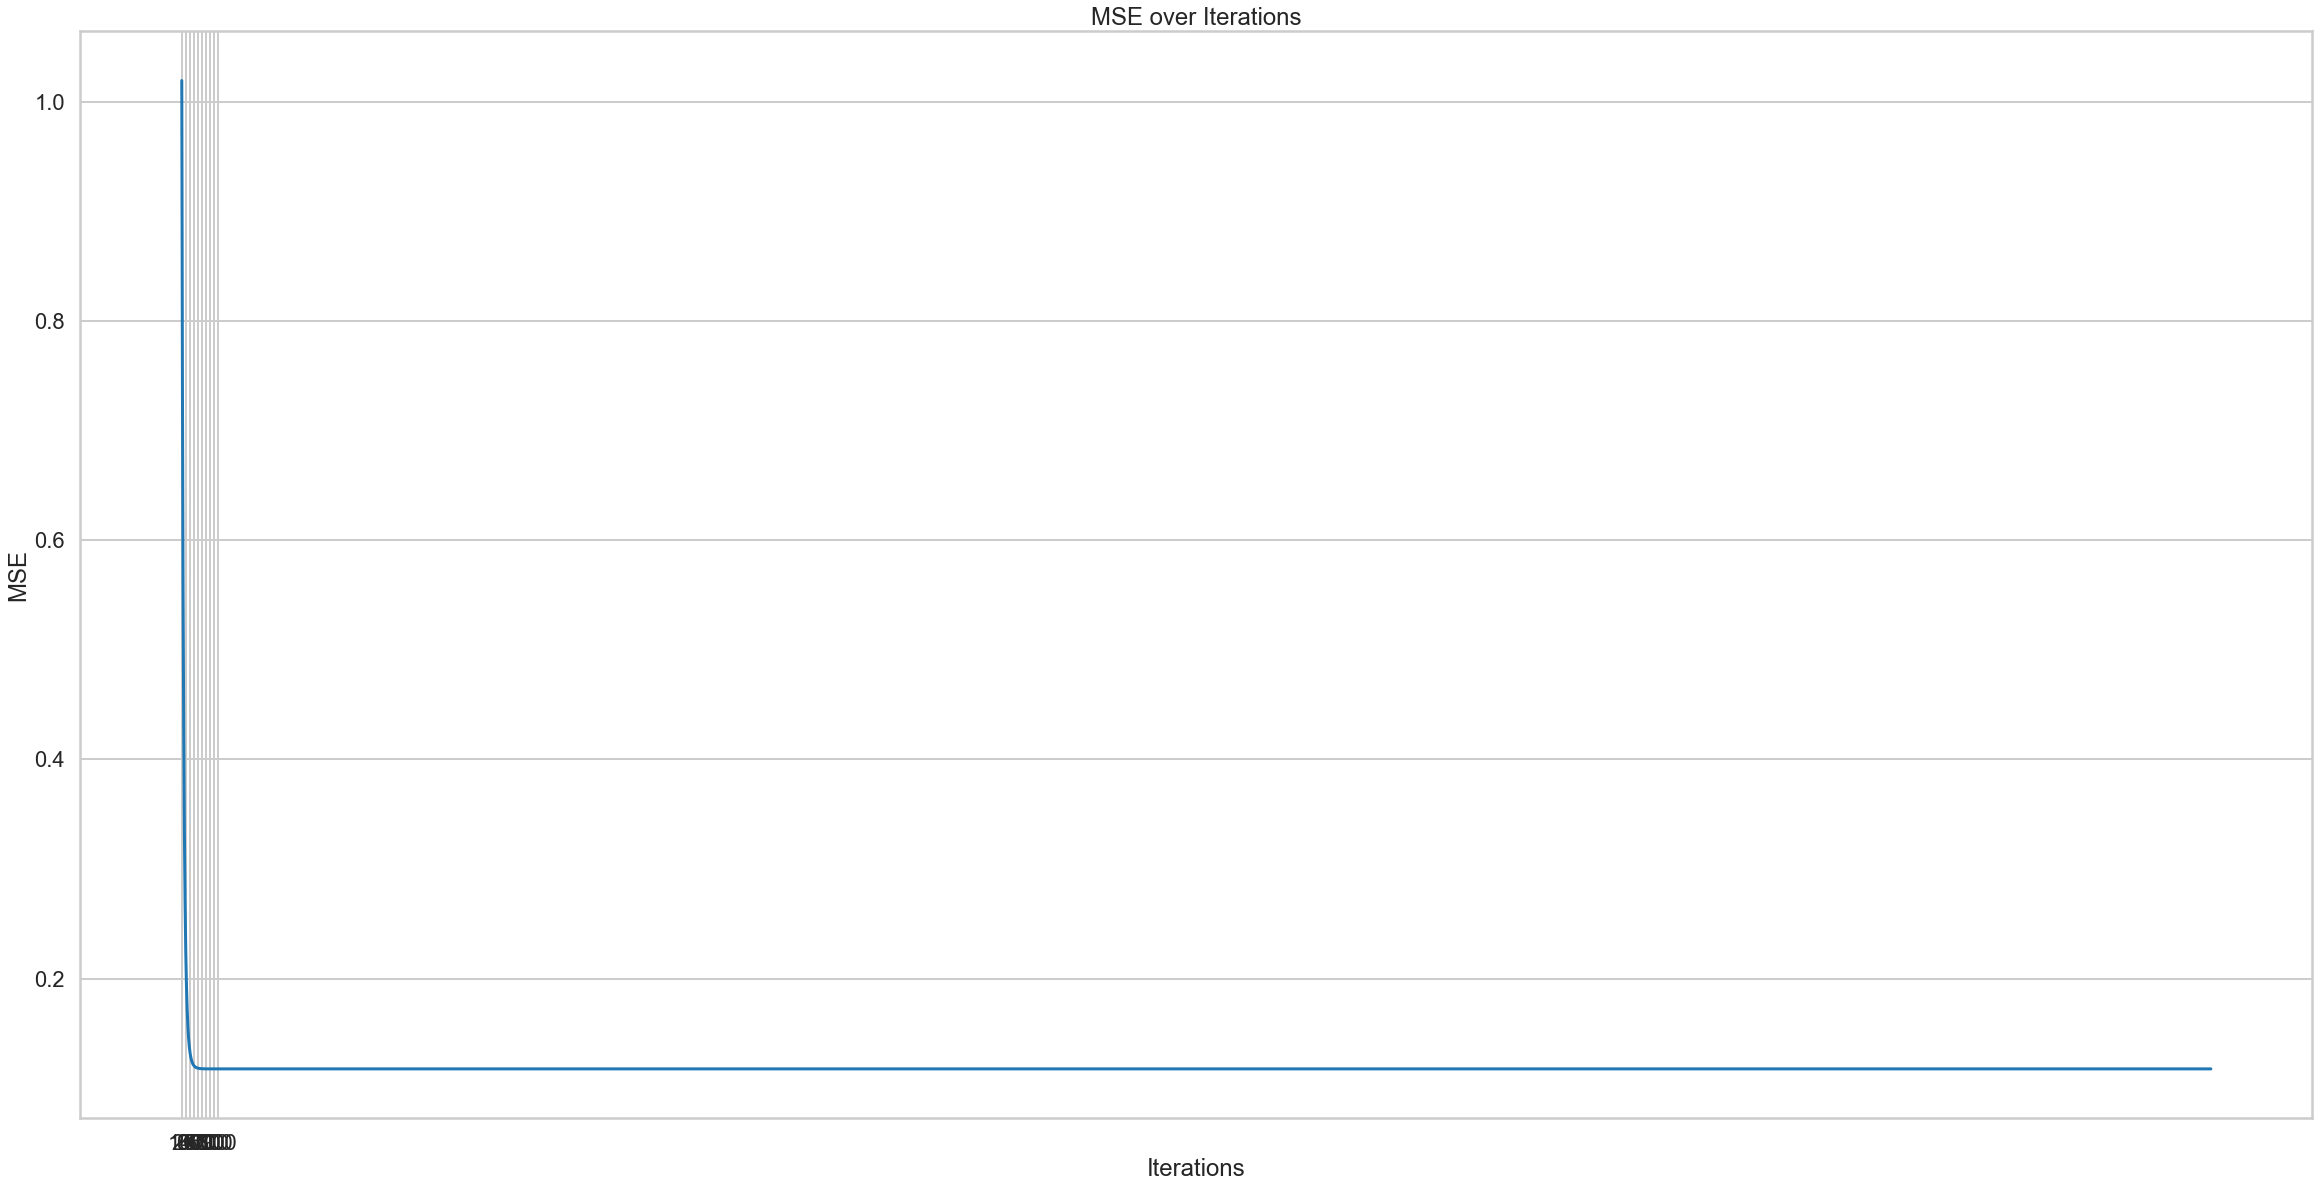

In [46]:
#Plotting it
plt.figure(figsize=(40,20))
plt.plot(mse_list)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE over Iterations')
plt.xticks(np.arange(0, 1000, 100))
plt.show()

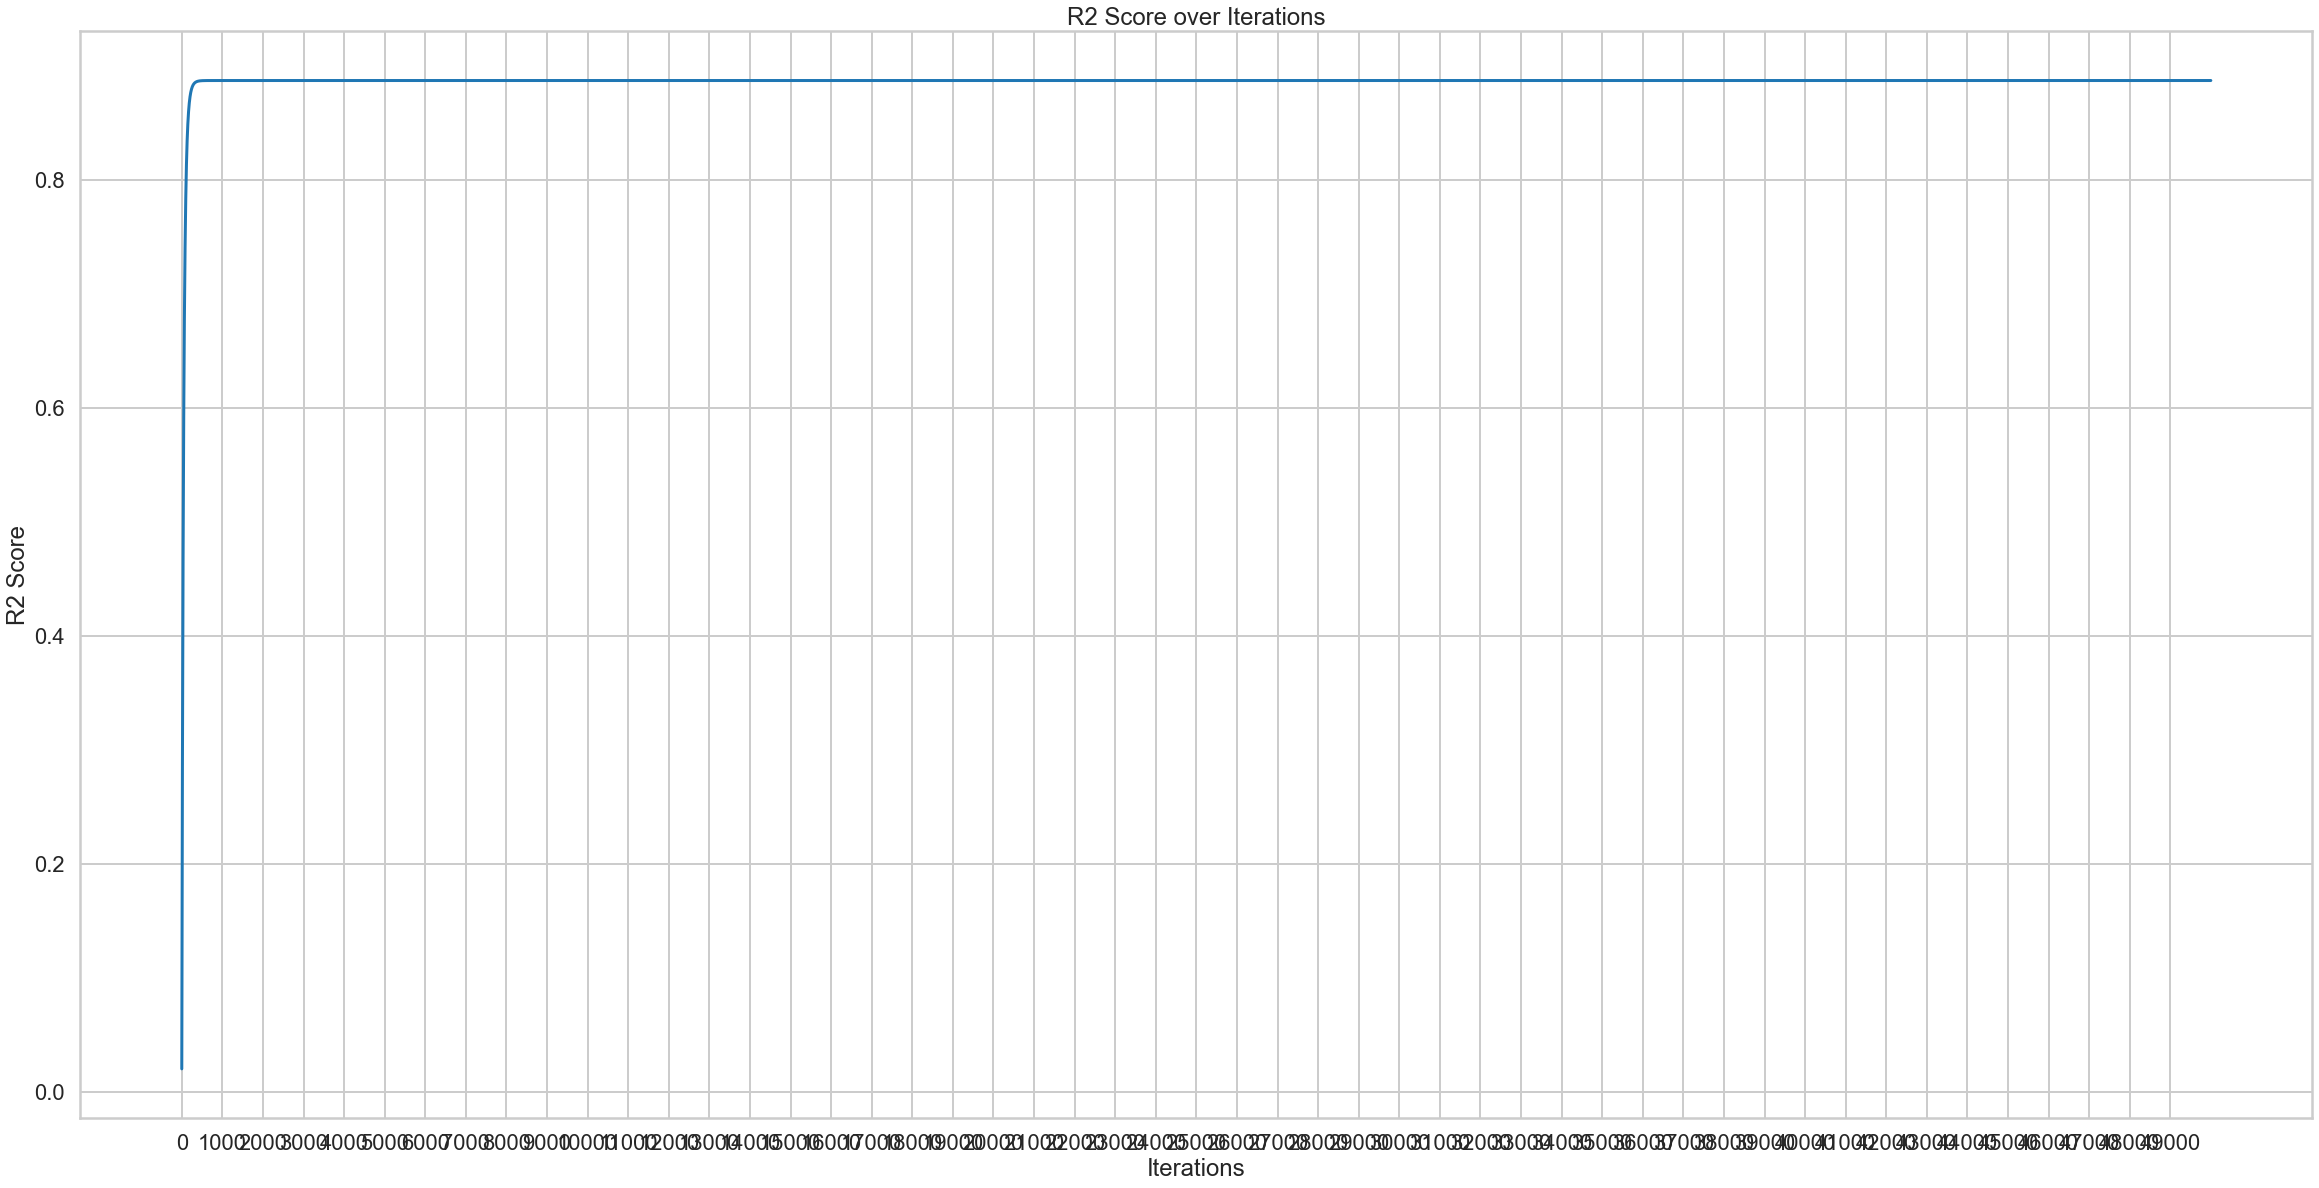

In [47]:
#Plotting it
plt.figure(figsize=(40,20))
plt.plot(r2_list)
plt.xlabel('Iterations')
plt.ylabel('R2 Score')
plt.title('R2 Score over Iterations')
plt.xticks(np.arange(0, iterations, 1000))
plt.show()

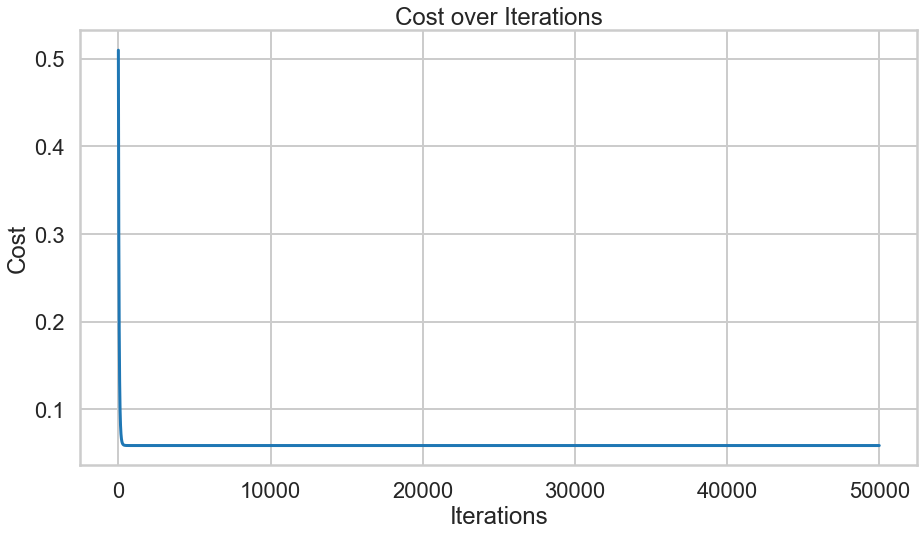

In [48]:
#Plotting the cost over iterations
plot_costs(cost_all)

In [49]:
#  4    Once you determine the optimal number of iterations, check the effect on the cost and
# error as you change the learning rate. The common learning rates in machine learning
# include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visualize
# the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE
# PLOT. Provide your analysis.


#Determining the optimal number of iterations
def optimal_iterations(max_r2, r2_arr):
    for j in range(len(r2_arr)):
        if r2_arr[j] == max_r2:
            return j

optimal_num = optimal_iterations(max(r2_list), r2_list)
print(f"The optimal number of iterations is {optimal_num}")

The optimal number of iterations is 2554


In [50]:
# approximate for the optimal number of iterations given alpha = 0.01
for i in range(iterations):
    # round the Cost to 4 decimal places
    # iteration_df["Cost"],4).min() is the minimum Cost rounded to 4 decimal places,
    # this is where the elbow is, and when the Cost value reduction plateaus
    if round(iteration_df["Cost"][i],4) == round(iteration_df["Cost"],4).min():
        print("Total iterations:", iterations)
        # print("Optimal number of iterations for alpha = 0.01:", i)
        optimal_iterations = i
        print("Cost plateau:", round(iteration_df["Cost"][i],4))
        break

print("alpha = 0.01, optimal number of iterations:", optimal_iterations)

Total iterations: 50000
Cost plateau: 0.0588
alpha = 0.01, optimal number of iterations: 476


In [51]:
#Cost at the optimal number of iterations
print(f"The cost at the optimal number of iterations is {cost_all[optimal_num]}")
#Weights at the optimal number of iterations
print(f"The weights at the optimal number of iterations are {weights_all[optimal_num]}\n")

#Last iteration
print(f"The cost at the last iteration is {cost_all[-1]}")
print(f"The weights at the last iteration are {weights_all[-1]}")

The cost at the optimal number of iterations is 0.05877930225761498
The weights at the optimal number of iterations are [-1.96670165e-02  7.51969466e-01  5.36417967e-01 -1.45852315e-04]

The cost at the last iteration is 0.05877930225761498
The weights at the last iteration are [-1.96670168e-02  7.51969467e-01  5.36417971e-01 -1.45856666e-04]


In [52]:
#Optimized Gradient Descent Algorithm
def optimized_gda(X, y, weights, alpha, iterations, diff_threshold):
    last_iter = 0
    weights_all = []
    cost_all = []

    for j in range(iterations):
        weights = update_weights(X, y, weights, alpha)
        weights_all.append(weights)
        cost = compute_cost(X, y, weights)
        cost_all.append(cost)

        if j > 0 and diff_threshold > abs(cost_all[j] - cost_all[j - 1]):
            last_iter = j
            break
        last_iter = j
    
    return weights_all, cost_all, last_iter

iterations = 50000
alpha = 0.01

diff_threshold = 1.0e-15

weights_all, cost_all, optimal_iterations = optimized_gda(X_training, y_training, w, alpha, iterations, diff_threshold)


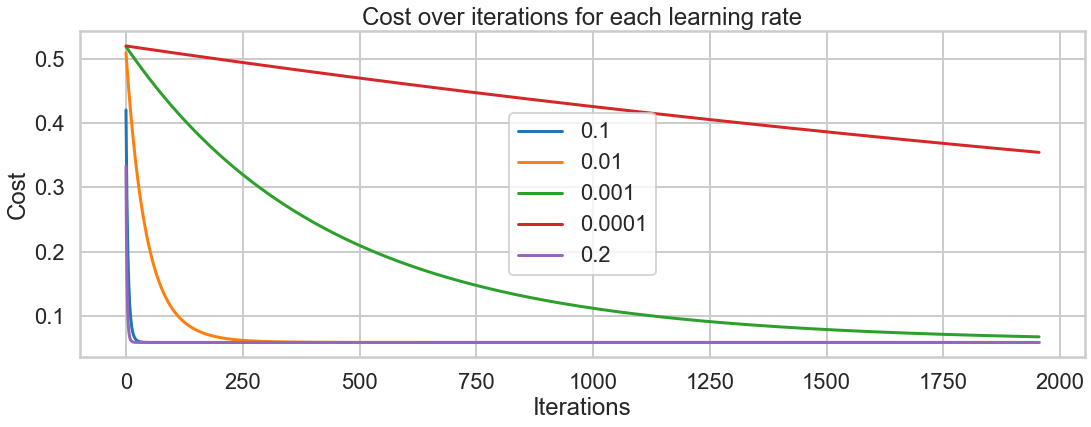

In [53]:
weight4 = initialize_weights()

iterations = optimal_iterations

#Learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.2]

cost_dict = {j:0 for j in learning_rates}
error_dict = {j:0 for j in learning_rates}
co_dict = {j:[] for j in learning_rates}

for alpha in learning_rates:
    weights_all, cost_all = grad_descent(X_training, y_training, weight4, alpha, iterations)
    cost_dict[alpha] = cost_all[-1]
    from sklearn.metrics import mean_squared_error
    error_dict[alpha] = mean_squared_error(y_training, predict(X_training, weights_all[-1]))
    co_dict[alpha] = cost_all
    
    
plt.figure(figsize=(18,6))
for alpha in learning_rates:
    plt.plot(co_dict[alpha], label = alpha)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over iterations for each learning rate')
plt.legend()
plt.show()      


In [54]:

learning_rates = pd.DataFrame({'Learning Rate': list(cost_dict.keys()), 'Cost': list(cost_dict.values()), 'Error': list(error_dict.values())})
learning_rates 

,Learning Rate,Cost,Error
0,0.1000,0.058779,0.117559
1,0.0100,0.058779,0.117559
2,0.0010,0.067529,0.135058
3,0.0001,0.354574,0.709148
4,0.2000,0.058779,0.117559


In [55]:
#   5  Is there a relationship on the learning rate and the number of iterations?



weight5 = initialize_weights()

iterations = 1_000_000

learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.2]

cost_dict = {j:0 for j in learning_rates}
error_dict = {j:0 for j in learning_rates}
co_dict = {j:[] for j in learning_rates}
opt_dict = {j:0 for j in learning_rates}

diff_threshold = 1.0e-15

for alpha in learning_rates:
    weights_all, cost_all, optimal_iterations = optimized_gda(X_training, y_training, weight5, alpha, iterations, diff_threshold)

    cost_dict[alpha] = cost_all[-1]
    from sklearn.metrics import mean_squared_error
    error_dict[alpha] = mean_squared_error(y_training, predict(X_training, weights_all[-1]))
    co_dict[alpha] = cost_all
    opt_dict[alpha] = optimal_iterations 

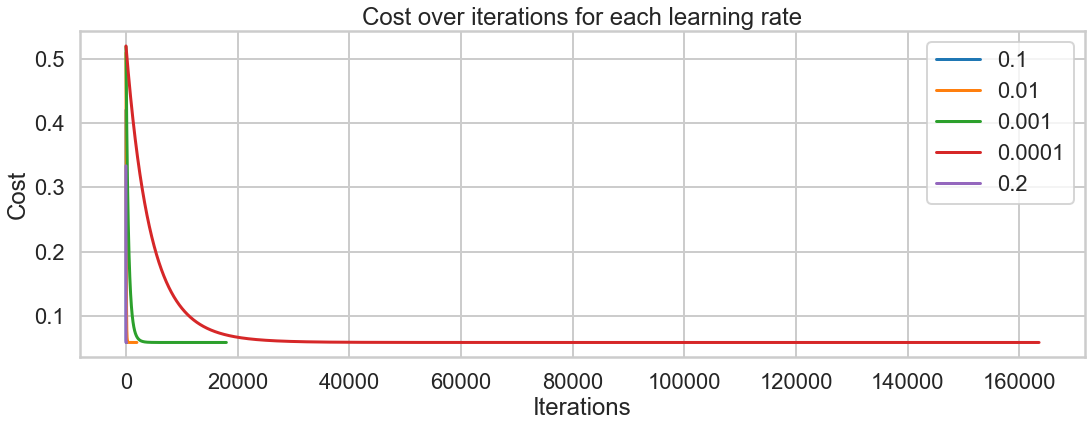

In [58]:
    plt.figure(figsize=(18,6))
    for alpha in learning_rates:
        plt.plot(co_dict[alpha], label = alpha)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost over iterations for each learning rate')
    plt.legend()
    plt.show()

In [65]:
#Ordinary Least Squares Function
from sklearn.linear_model import LinearRegression
ordinary_least_squares = LinearRegression()
ordinary_least_squares.fit(X_training, y_training).coef_

#r^2 score for the Ordinary Least Squares and the Gradient Descent Algorithm
r2_OLS = r2_score(y_training, ordinary_least_squares.predict(X_training))
r2_GDA = r2_list[-1]

print(f"The results of OLS is {r2_OLS}")
print(f"The results of GDA is {r2_GDA}")

The results of OLS is 0.8870107435670415
The results of GDA is 0.8870107435670415
